In [1]:
import numpy as np
import pandas as pd
import datetime

## Data Cleaning

In [2]:
airbnb = pd.read_csv('data/airbnb.csv', low_memory=False)

In [3]:
relevantCols = ['amenities', 'first_review', 'host_neighbourhood', 
            'last_review', 'neighbourhood_cleansed', 'nightly_price', 
            'price_per_stay', 'property_type', 'review_scores_rating', 
            'room_type', 'number_of_reviews']

airbnb = airbnb[relevantCols]

In [4]:
airbnb.amenities = airbnb.amenities.str.slice(1,-1).str.replace('"', '').str.split(',')

In [5]:
airbnb.first_review = pd.to_datetime(airbnb.first_review.str.replace('/','-'))
airbnb.last_review = pd.to_datetime(airbnb.last_review.str.replace('/','-'))

C:\Users\Michiko\AppData\Local\Temp\ipykernel_28656\24953350.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airbnb.first_review = pd.to_datetime(airbnb.first_review.str.replace('/','-'))
C:\Users\Michiko\AppData\Local\Temp\ipykernel_28656\24953350.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  airbnb.last_review = pd.to_datetime(airbnb.last_review.str.replace('/','-'))


In [6]:
airbnb.nightly_price = (airbnb.nightly_price.str.slice(1)
                    .str.strip().str.replace(',', ''))
airbnb.nightly_price = airbnb.nightly_price.replace('', np.NaN).astype(float)
airbnb.price_per_stay = (airbnb.price_per_stay.str.slice(1)
                    .str.strip().str.replace(',', ''))
airbnb.price_per_stay = airbnb.price_per_stay.replace('', np.NaN).astype(float)

In [7]:
# number of days of reviews since first review
airbnb['days_of_reviews'] = (airbnb.last_review - airbnb.first_review).dt.days
# number of amenities
airbnb['num_amenities'] = airbnb.amenities.str.len()

In [8]:
airbnb = airbnb.dropna()
airbnb.head()

,amenities,first_review,host_neighbourhood,last_review,neighbourhood_cleansed,nightly_price,price_per_stay,property_type,review_scores_rating,room_type,number_of_reviews,days_of_reviews,num_amenities
1,"[TV, Wifi, Air conditioning, Kitchen, Free par...",2017-04-22,La Jolla,2017-08-31,La Jolla,1400.0,1400.0,Apartment,100.0,Entire home/apt,2.0,131.0,21.0
4,"[TV, Wifi, Kitchen, Free parking on premises, ...",2015-02-22,La Jolla,2018-09-23,La Jolla,110.0,110.0,Condominium,90.0,Private room,2.0,1309.0,11.0
10,"[TV, Cable TV, Internet, Wifi, Air conditionin...",2016-10-10,Black Mountain Ranch,2017-05-27,Rancho Penasquitos,75.0,75.0,Bungalow,93.0,Entire home/apt,3.0,229.0,34.0
12,"[TV, Internet, Wifi, Kitchen, Free parking on ...",2015-11-19,Pacific Beach,2018-07-02,Mission Bay,75.0,4500.0,House,100.0,Private room,27.0,956.0,37.0
13,"[TV, Wifi, Pool, Kitchen, Free parking on prem...",2016-02-21,Pacific Beach,2019-05-12,Pacific Beach,65.0,3900.0,Condominium,97.0,Entire home/apt,12.0,1176.0,32.0


# EDA

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

Let's see which neighbourhoods have the highest average rating! This helps us see if there's a neighbourhood with significantly higher ratings.

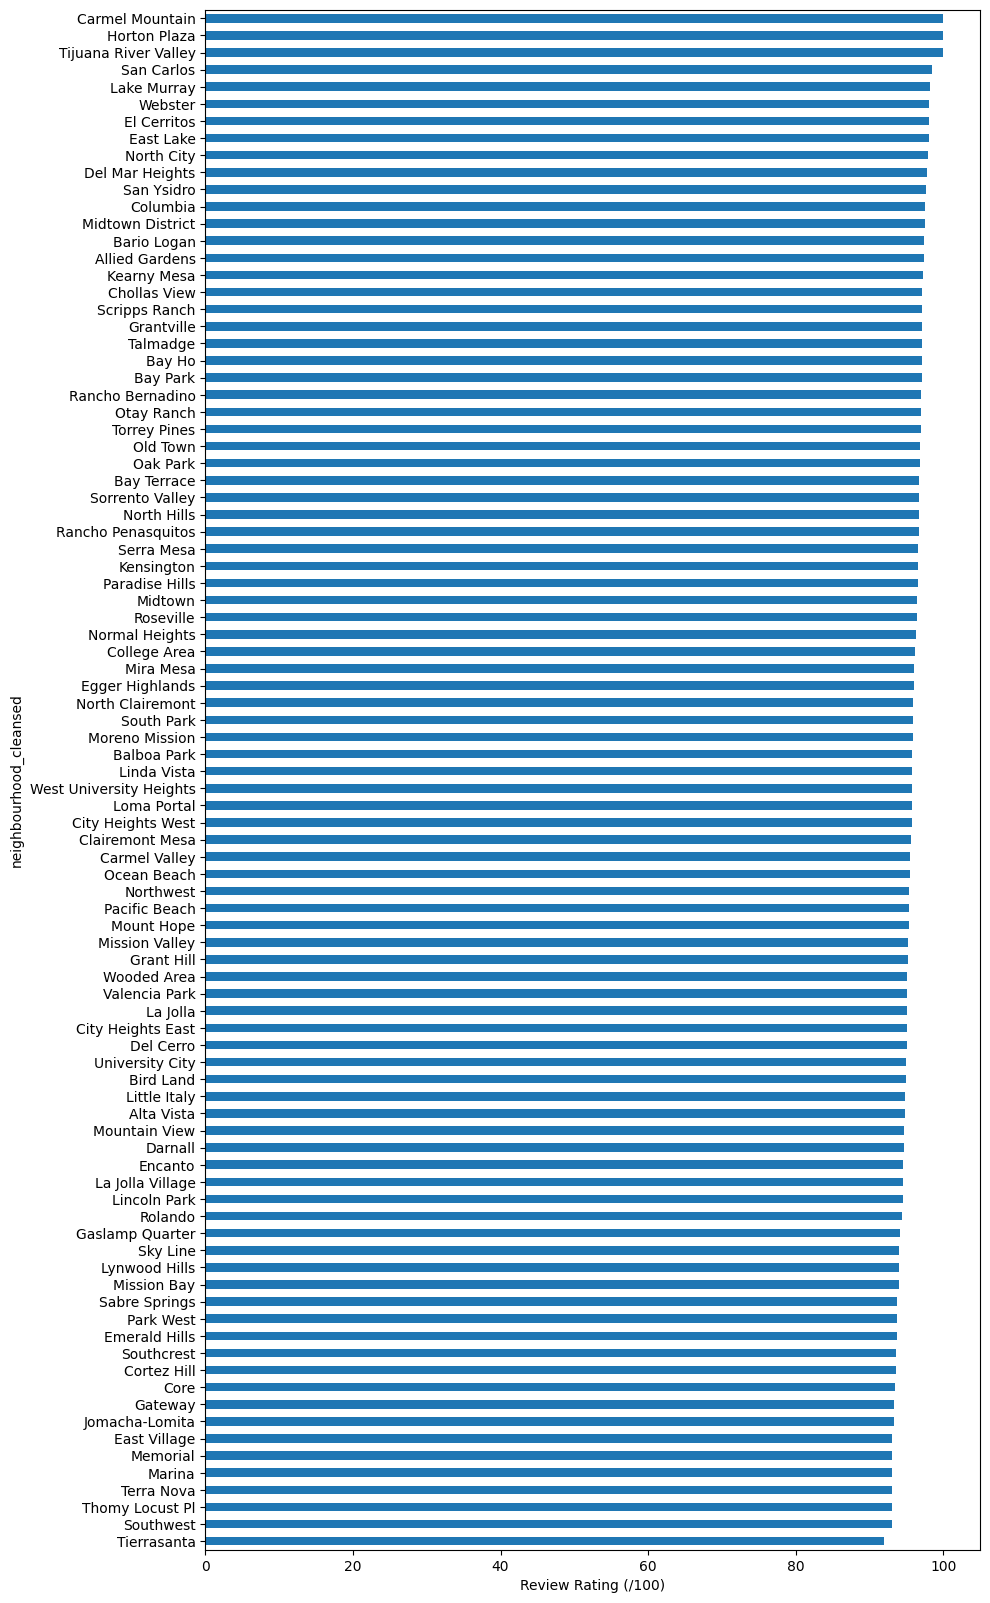

In [10]:
plt.figure(figsize=(10,20))
(
airbnb.groupby('neighbourhood_cleansed')['review_scores_rating']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Review Rating (/100)')
plt.show()

Let's checkout the correlation to **host** neighborhoods

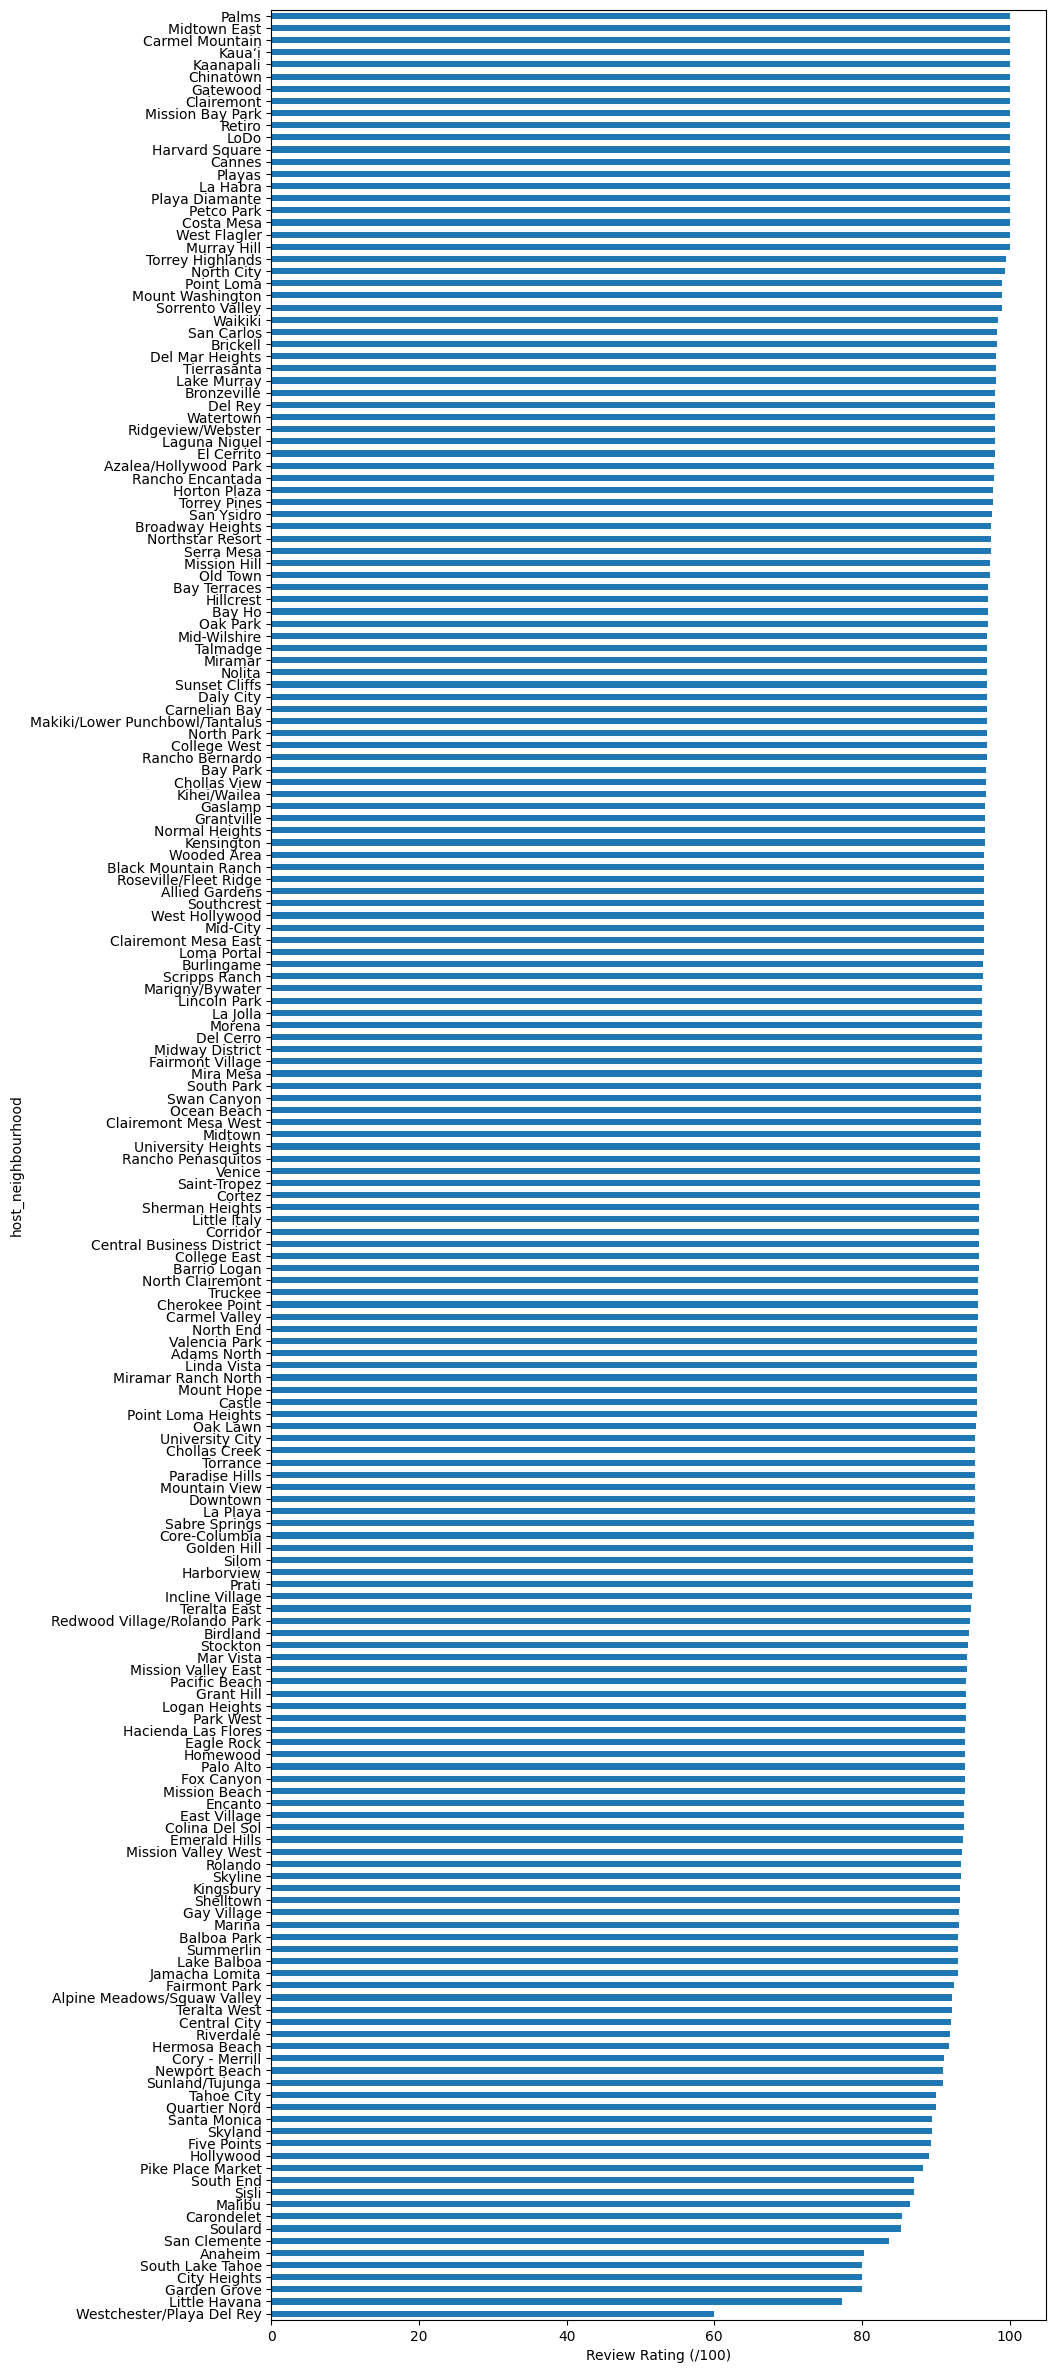

In [11]:
plt.figure(figsize=(10,30))
(
airbnb.groupby('host_neighbourhood')['review_scores_rating']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Review Rating (/100)')
plt.show()

Let's see the correlation between price and rating!

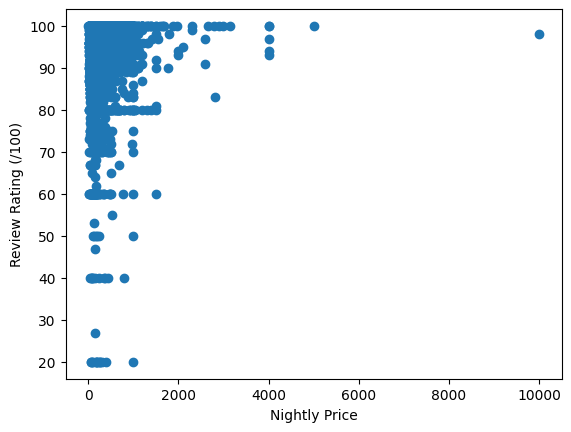

In [12]:
plt.scatter(airbnb['nightly_price'], airbnb['review_scores_rating'])
plt.xlabel('Nightly Price')
plt.ylabel('Review Rating (/100)')
plt.show()

Let's also see if any property types have higher ratings!

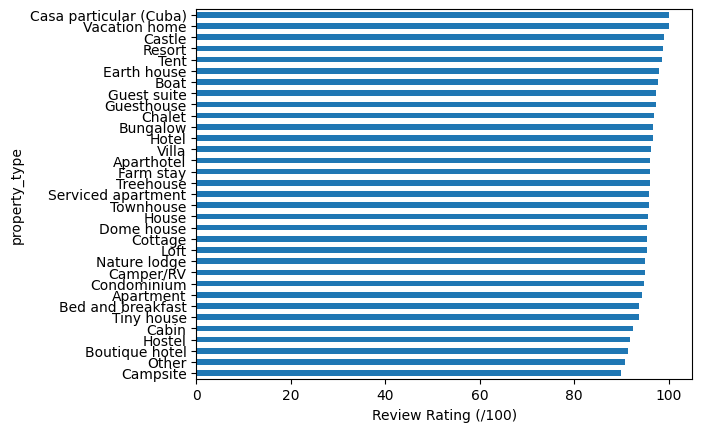

In [13]:
(
airbnb.groupby('property_type')['review_scores_rating']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Review Rating (/100)')
plt.show()

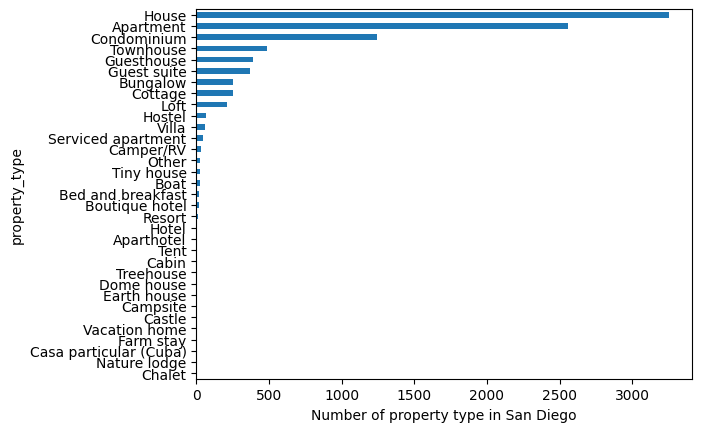

In [14]:
(
airbnb.property_type
.value_counts()
.sort_values()
.plot.barh()
)
plt.xlabel('Number of property type in San Diego')
plt.show()

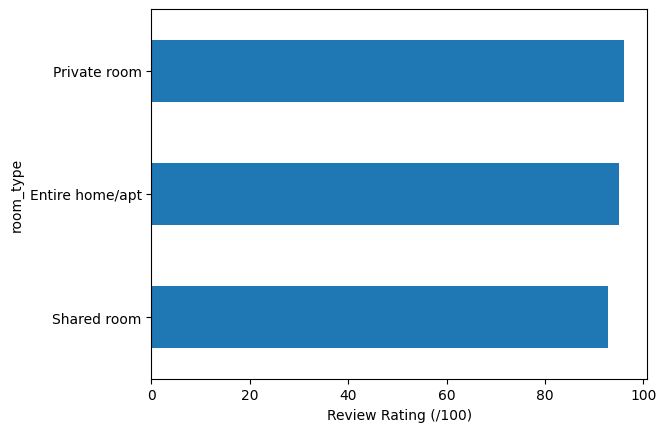

In [15]:
(
airbnb.groupby('room_type')['review_scores_rating']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Review Rating (/100)')
plt.show()

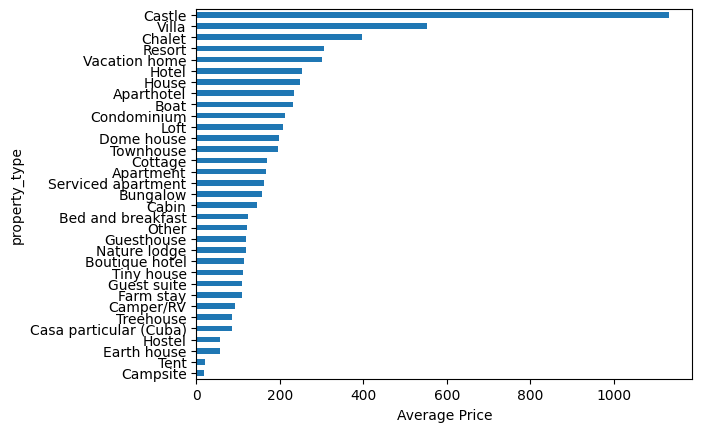

In [45]:
# Average price of each property type
(
airbnb.groupby('property_type')['nightly_price']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Average Price')
plt.show()

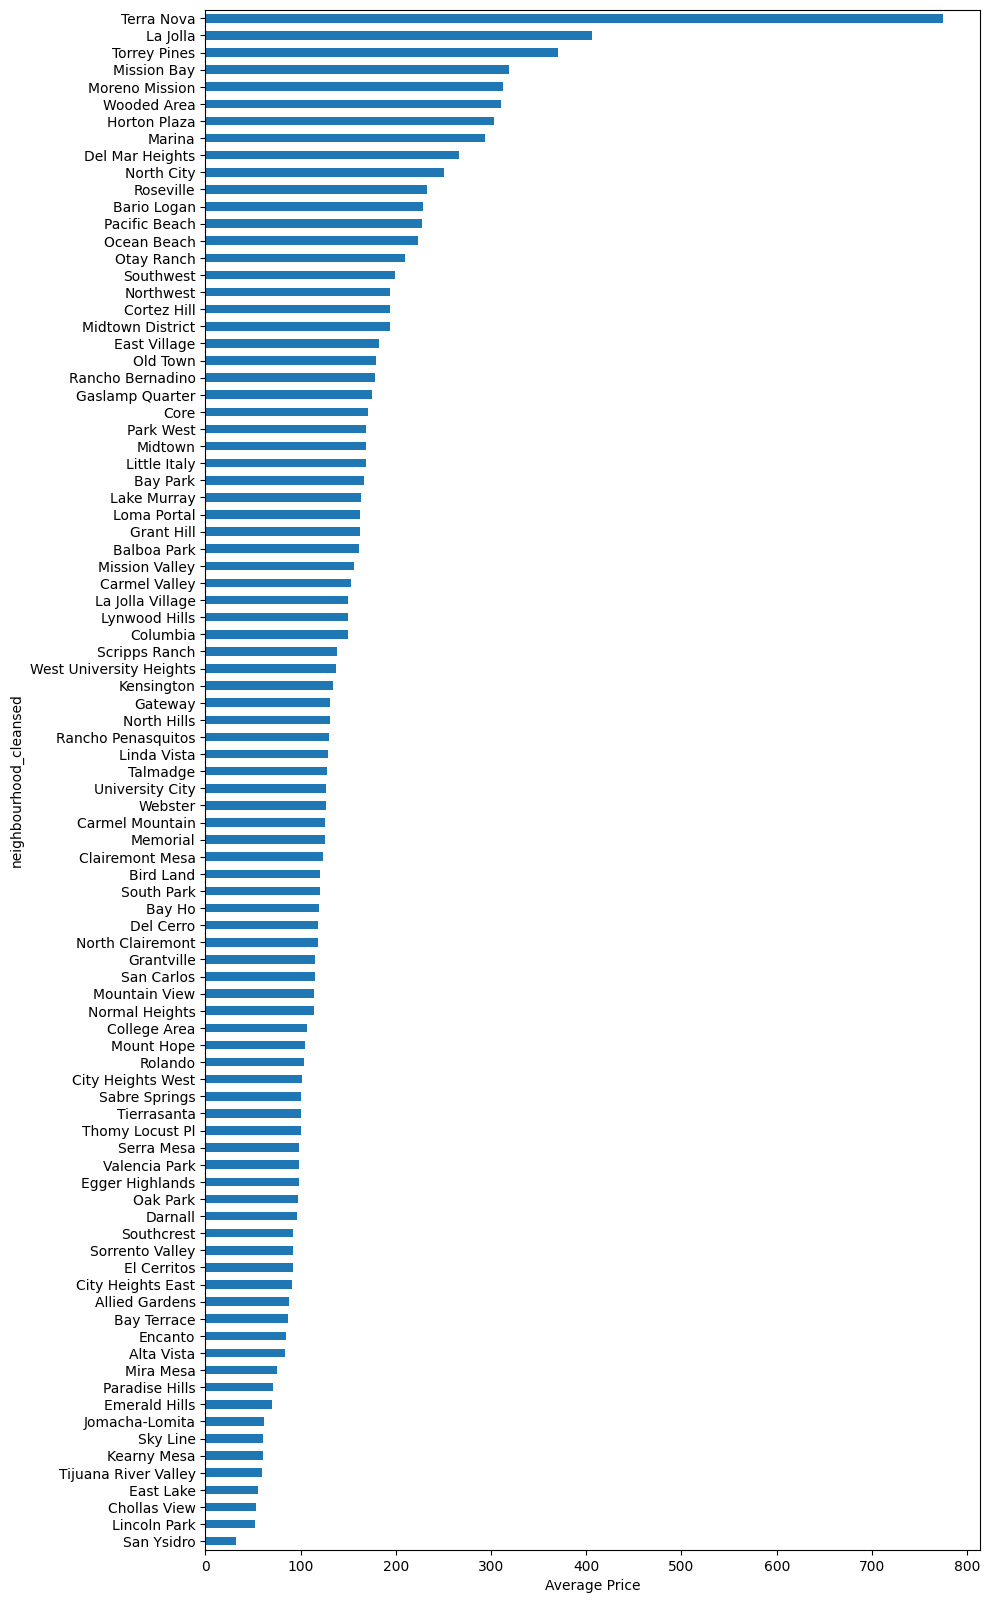

In [49]:
# Average price of each neighbourhood

plt.figure(figsize=(10,20))
(
airbnb.groupby('neighbourhood_cleansed')['nightly_price']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Average Price')
plt.show()

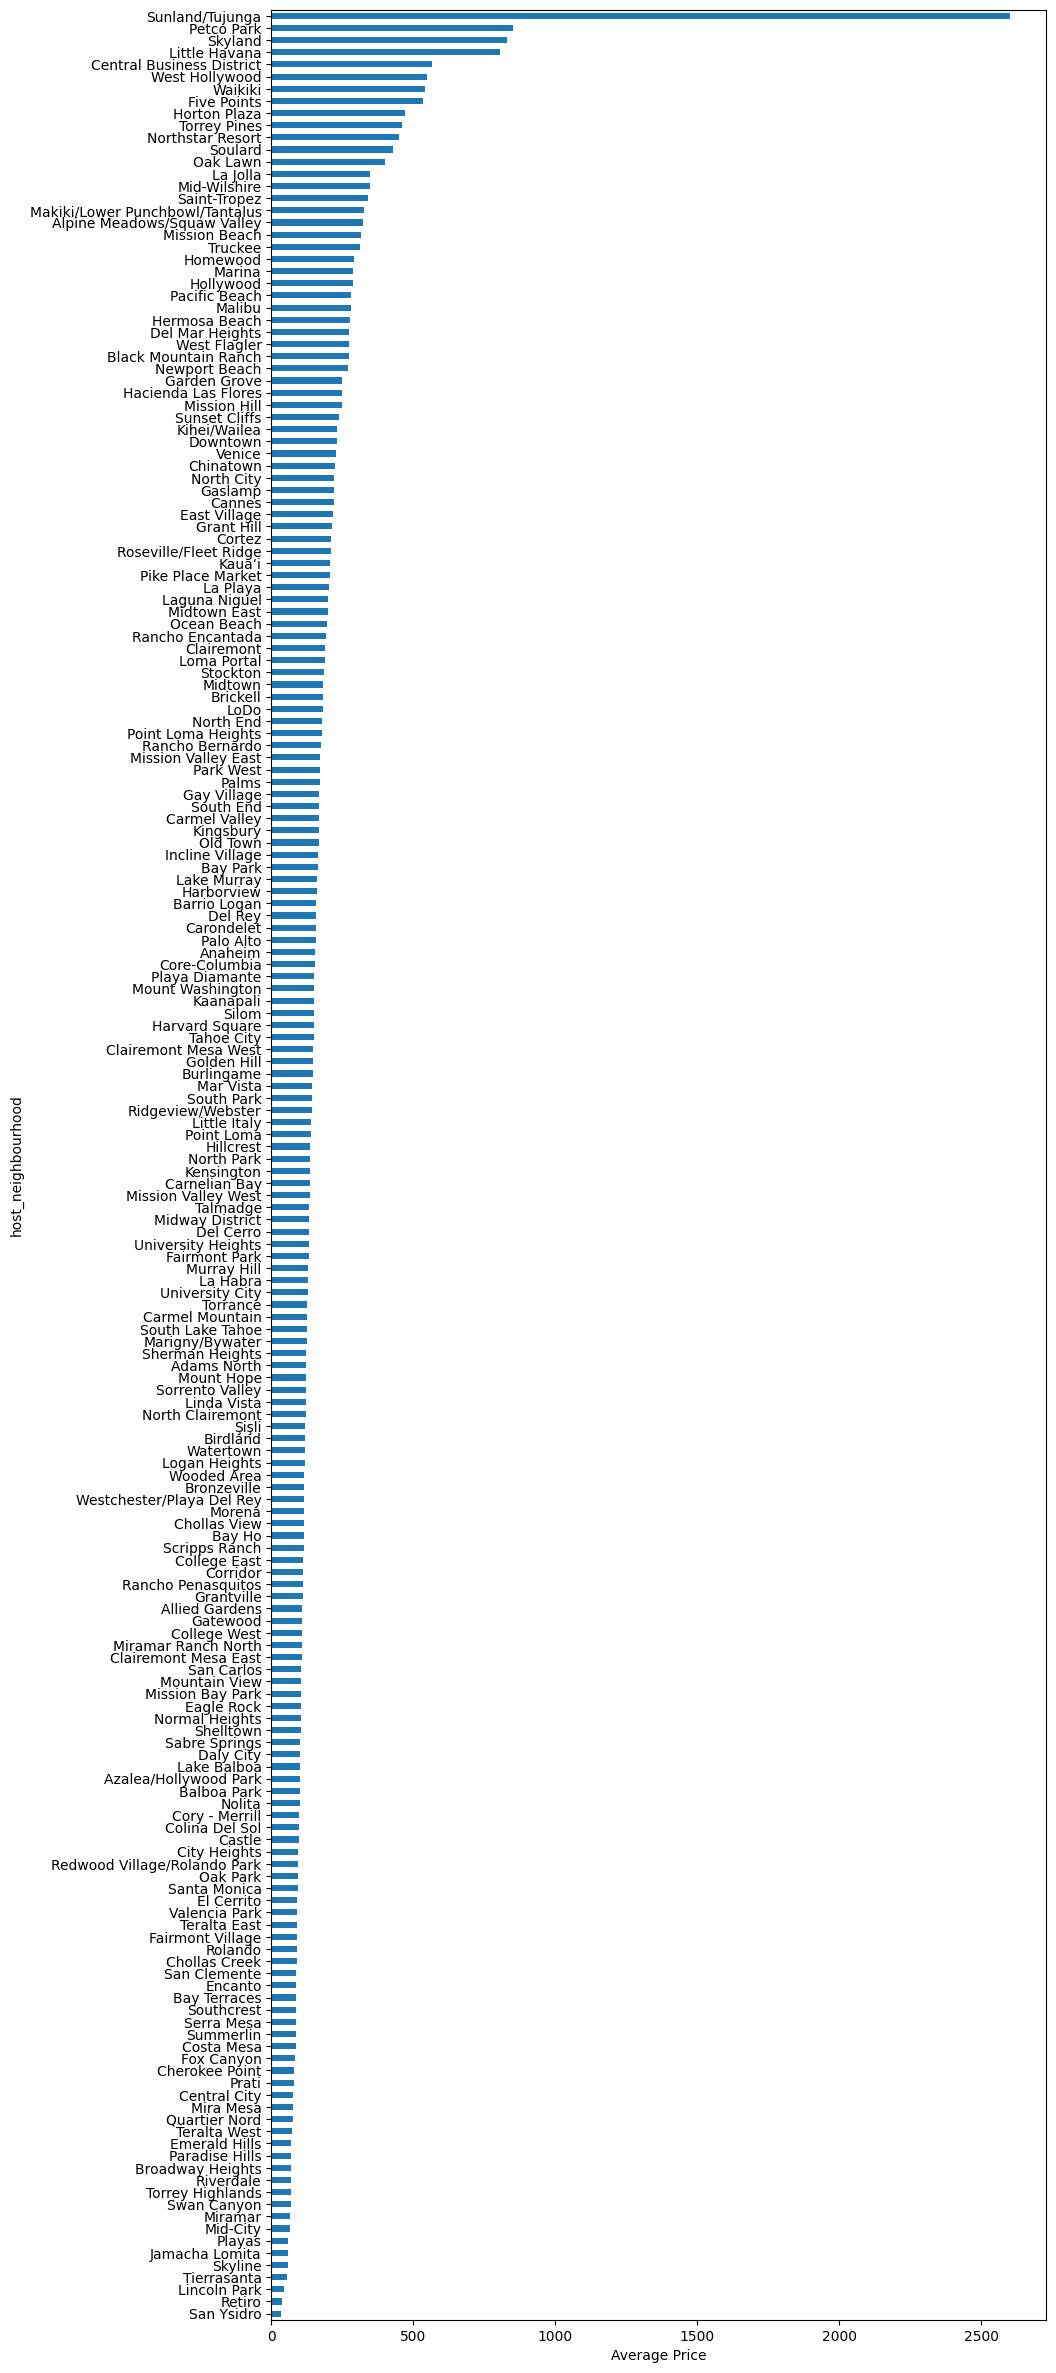

In [51]:
# Average price based on host's neighbourhood

plt.figure(figsize=(10,30))
(
airbnb.groupby('host_neighbourhood')['nightly_price']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Average Price')
plt.show()

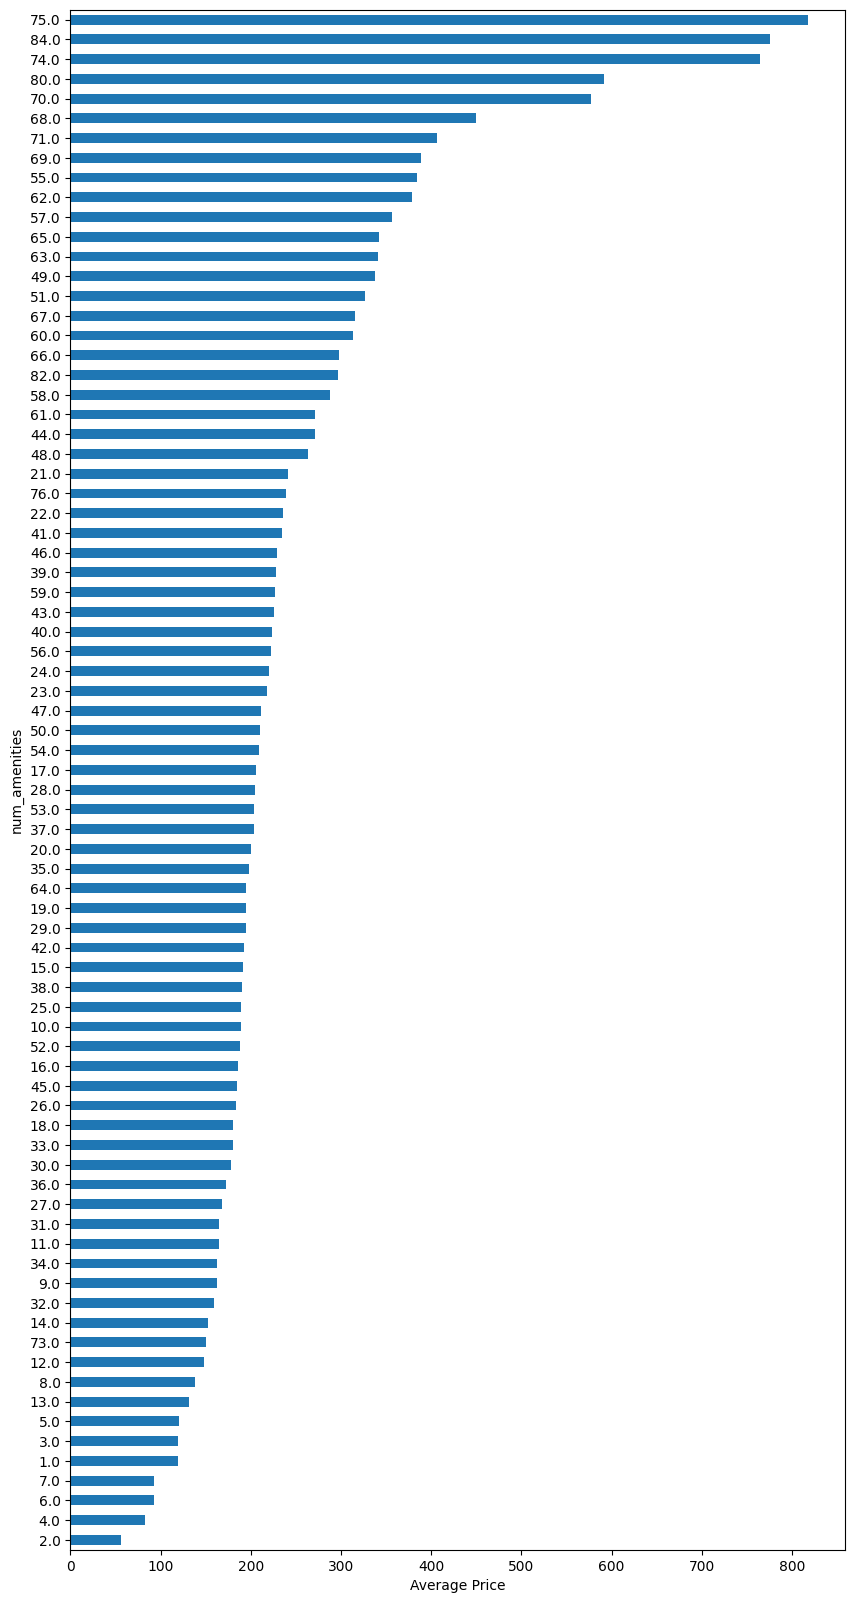

In [53]:
# Average price based on number of amenities

plt.figure(figsize=(10,20))
(
airbnb.groupby('num_amenities')['nightly_price']
.mean()
.sort_values()
.plot.barh()
)
plt.xlabel('Average Price')
plt.show()

<Axes: xlabel='number_of_reviews', ylabel='num_amenities'>

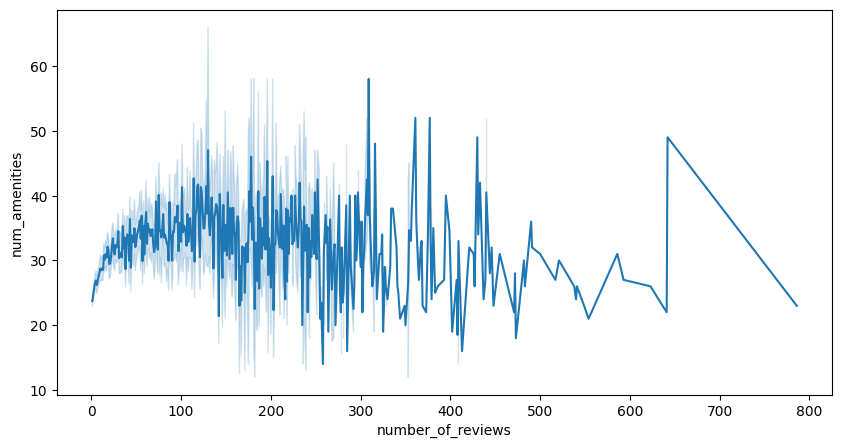

In [68]:
# compare whether number of reviews affects number of amenities

plt.figure(figsize=(10, 5))
sns.lineplot(data = airbnb, x = 'number_of_reviews', y = 'num_amenities')

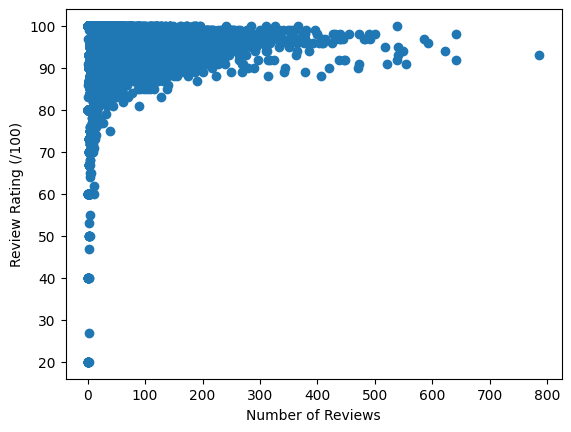

In [16]:
plt.scatter(airbnb['number_of_reviews'], airbnb['review_scores_rating'])
plt.xlabel('Number of Reviews')
plt.ylabel('Review Rating (/100)')
plt.show()

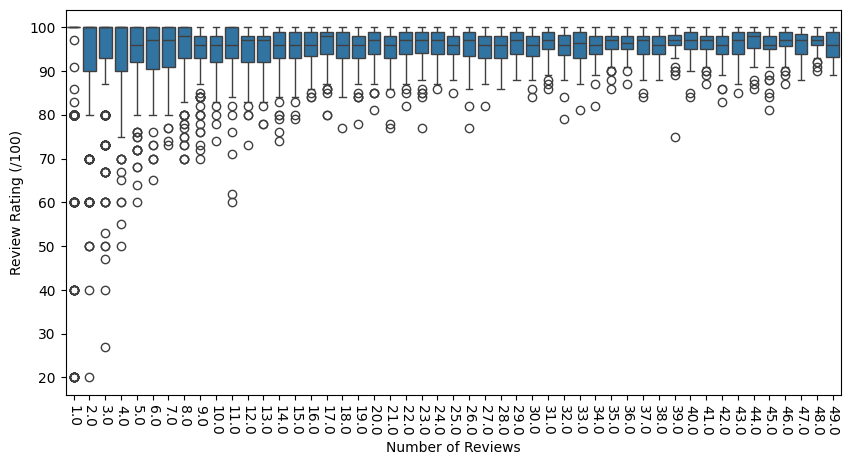

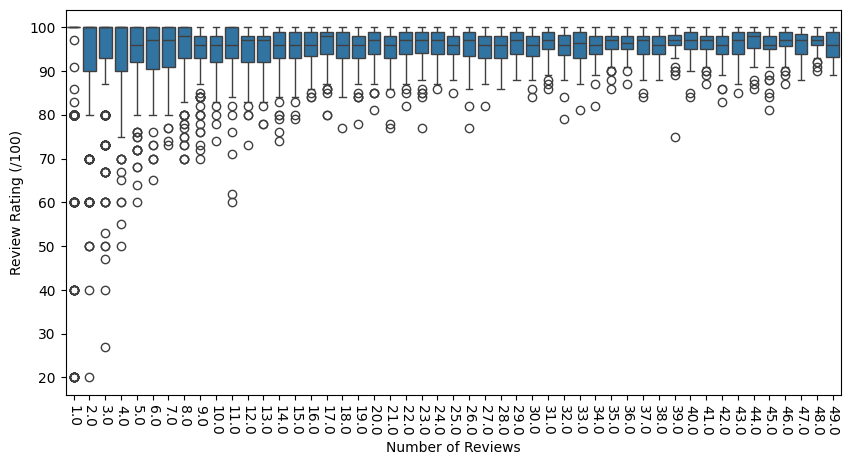

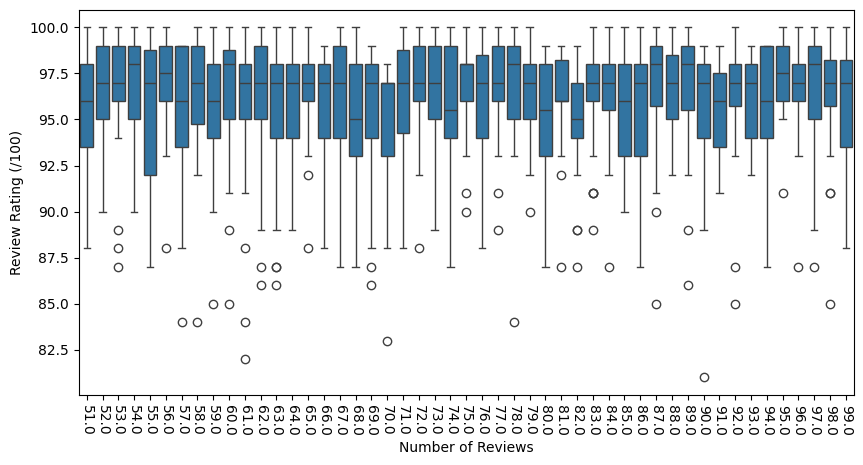

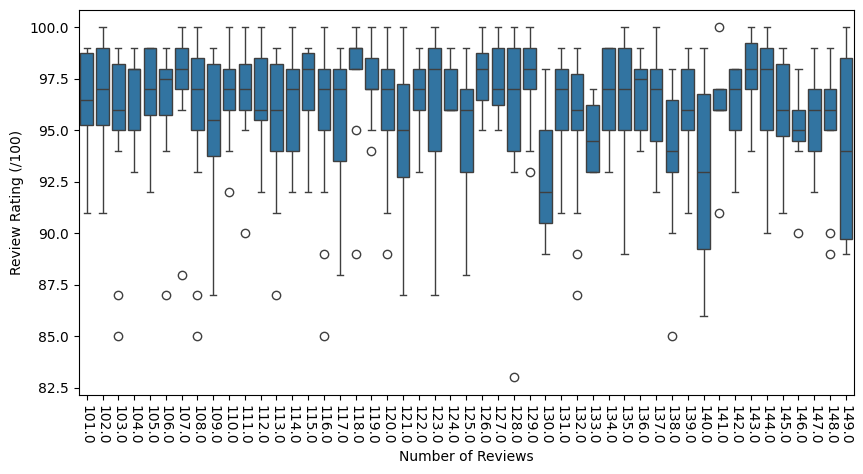

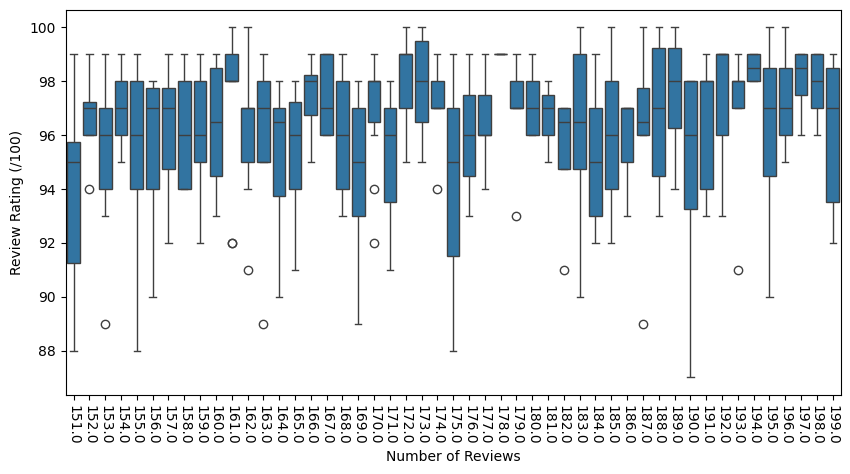

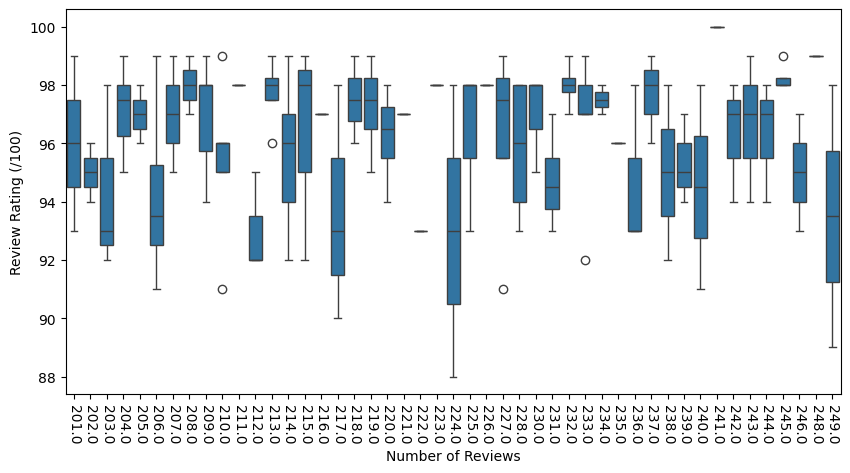

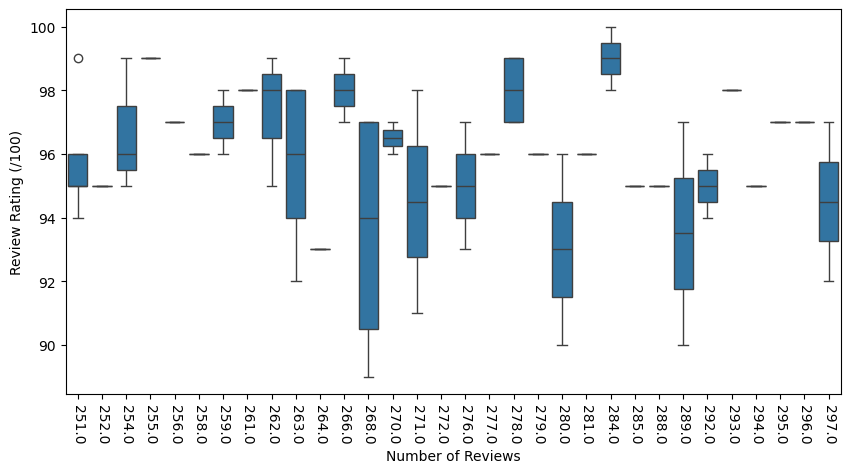

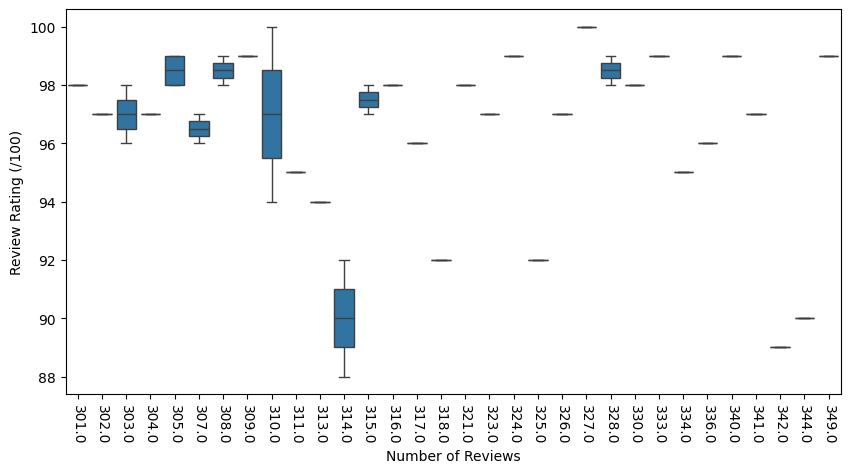

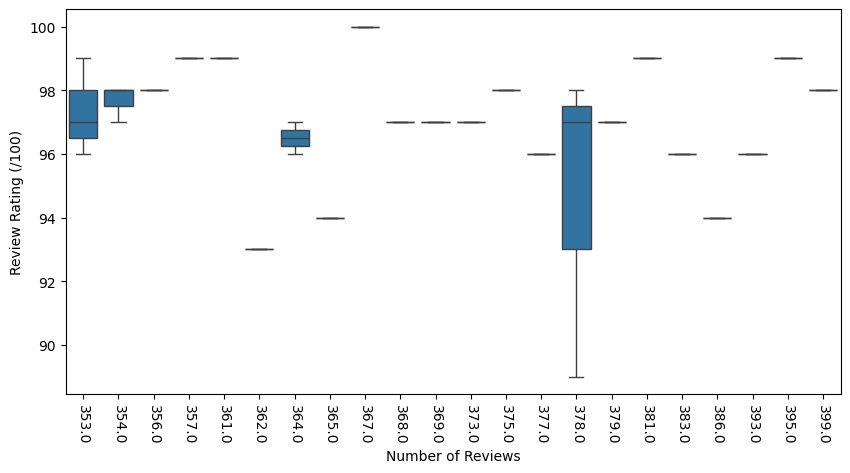

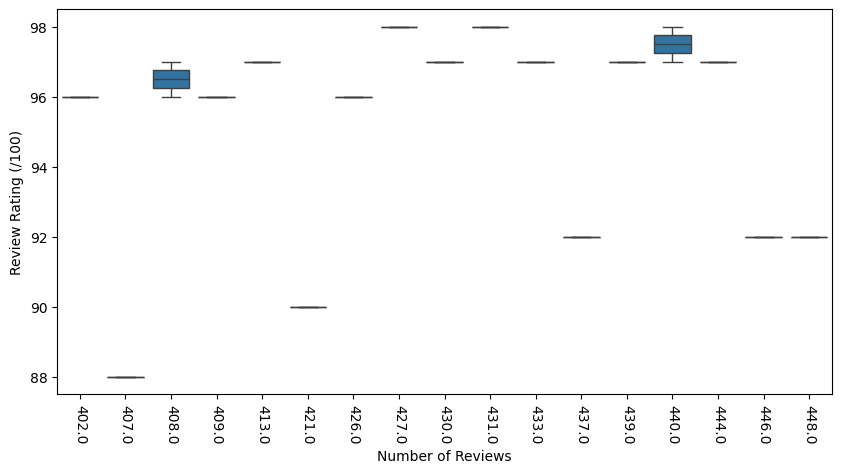

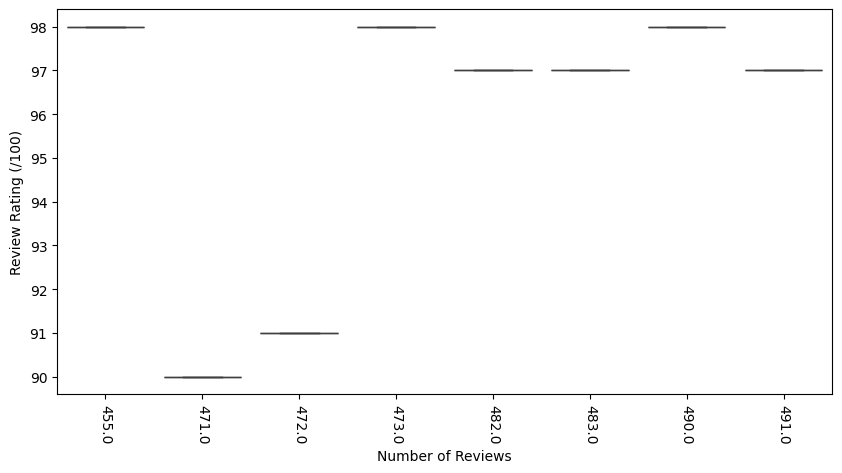

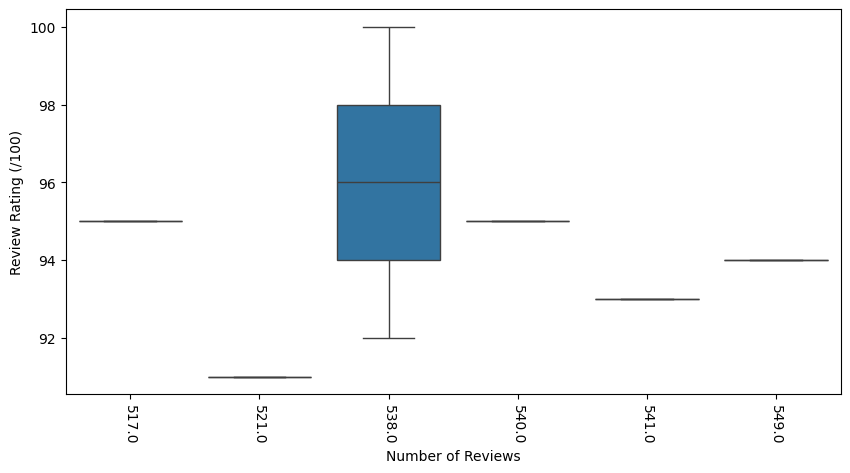

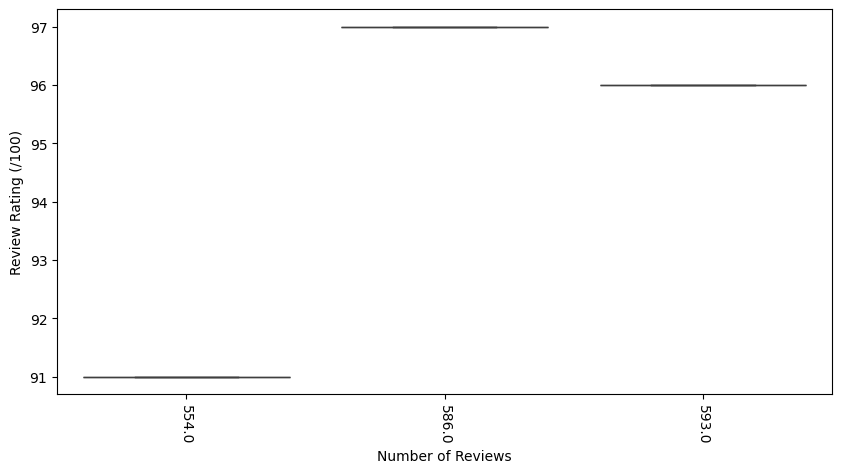

In [42]:
plot = 0
reviews = airbnb[(airbnb['number_of_reviews'] >= 0) & (airbnb['number_of_reviews'] < 50)]
for i in range(0, 650, 50):
    plt.figure(plot + 1, figsize=(10,5))
    sns.boxplot(data = reviews, x = 'number_of_reviews', y = 'review_scores_rating')
    plt.xticks(rotation=270)
    plt.xlabel('Number of Reviews')
    plt.ylabel('Review Rating (/100)')
    plt.show()
    reviews = airbnb[(airbnb['number_of_reviews'] > i) & (airbnb['number_of_reviews'] < (i+50))]

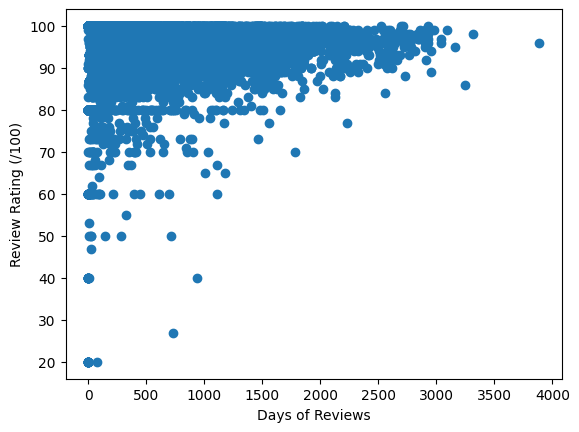

In [18]:
plt.scatter(airbnb['days_of_reviews'], airbnb['review_scores_rating'])
plt.xlabel('Days of Reviews')
plt.ylabel('Review Rating (/100)')
plt.show()

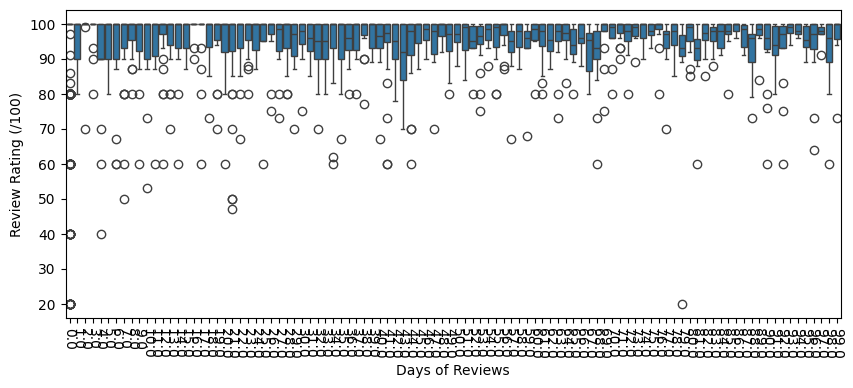

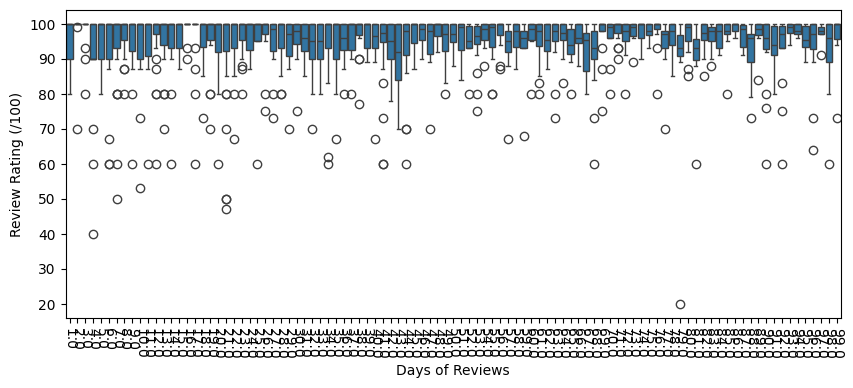

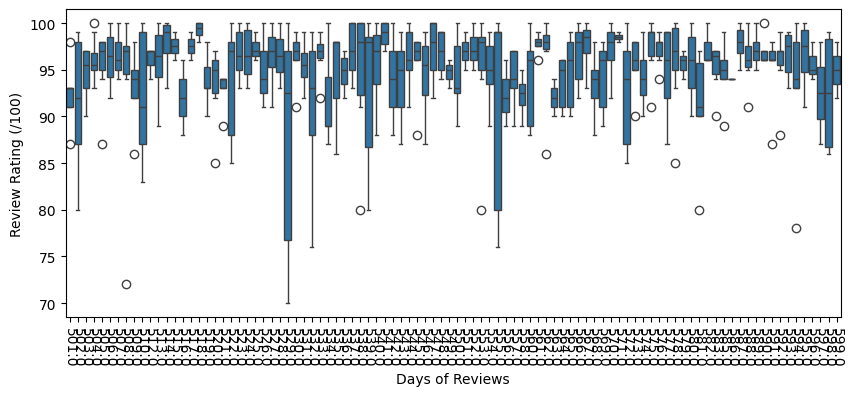

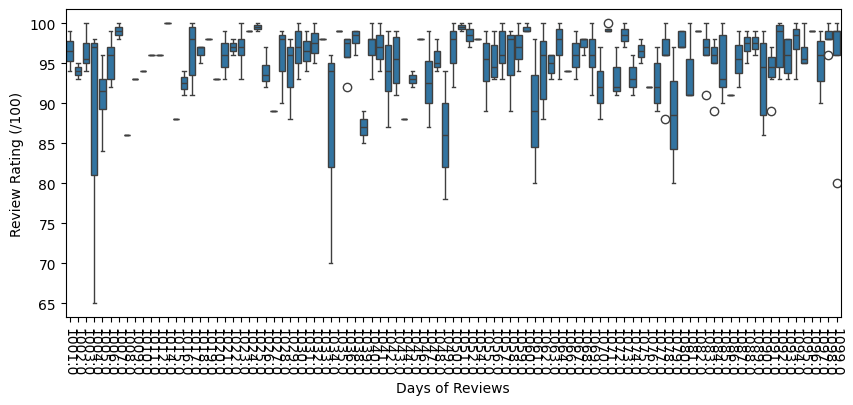

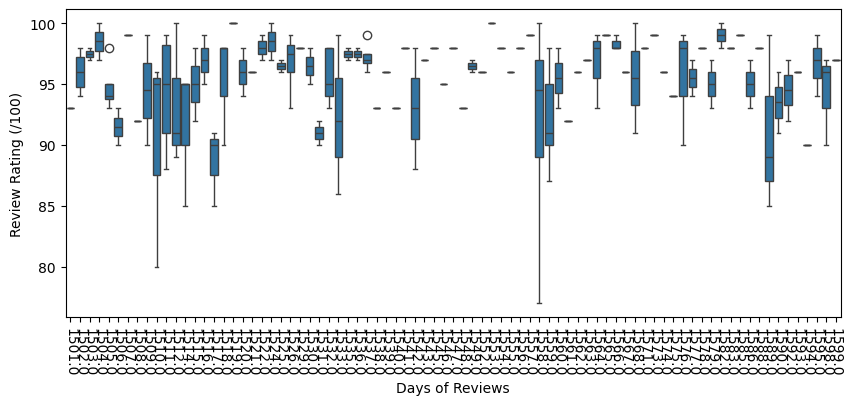

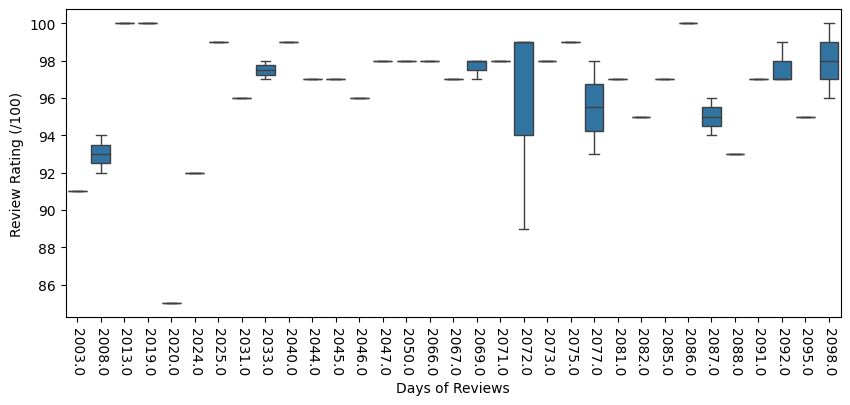

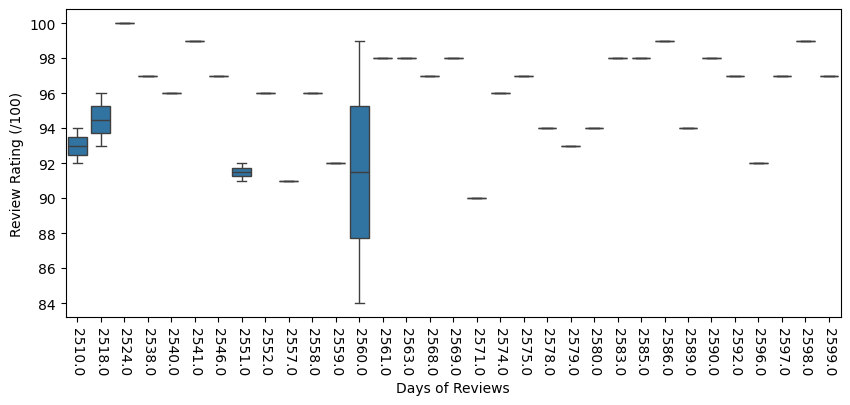

In [41]:
plot = 0
reviews = airbnb[(airbnb['days_of_reviews'] >= 0) & (airbnb['days_of_reviews'] < 100)]
for i in range(0, 3500, 500):
    plt.figure(plot + 1, figsize=(10, 4))
    sns.boxplot(data = reviews, x = 'days_of_reviews', y = 'review_scores_rating')
    plt.xticks(rotation=270)
    plt.xlabel('Days of Reviews')
    plt.ylabel('Review Rating (/100)')
    plt.show()
    reviews = airbnb[(airbnb['days_of_reviews'] > i) & (airbnb['days_of_reviews'] < (i+100))]

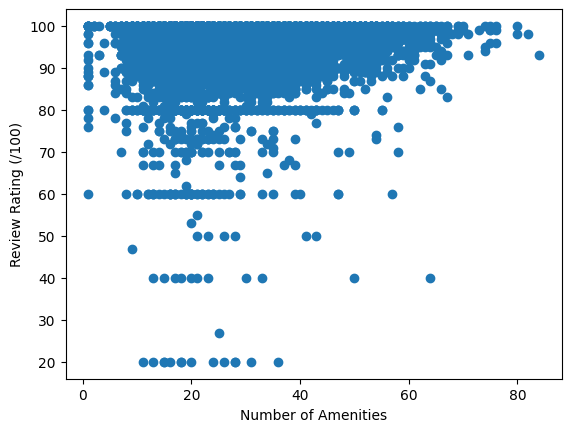

In [19]:
plt.scatter(airbnb['num_amenities'], airbnb['review_scores_rating'])
plt.xlabel('Number of Amenities')
plt.ylabel('Review Rating (/100)')
plt.show()

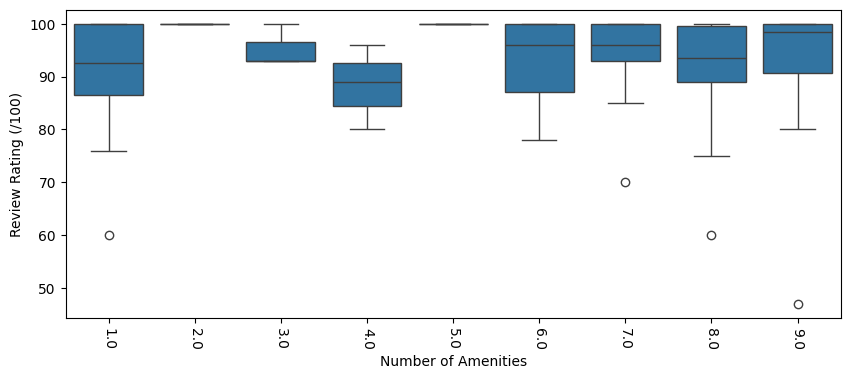

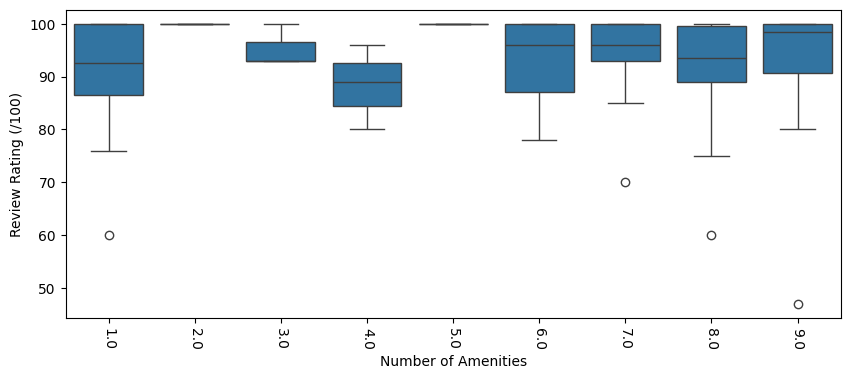

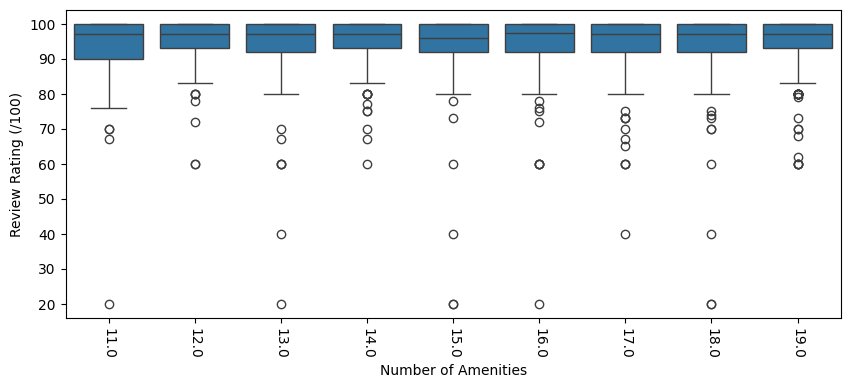

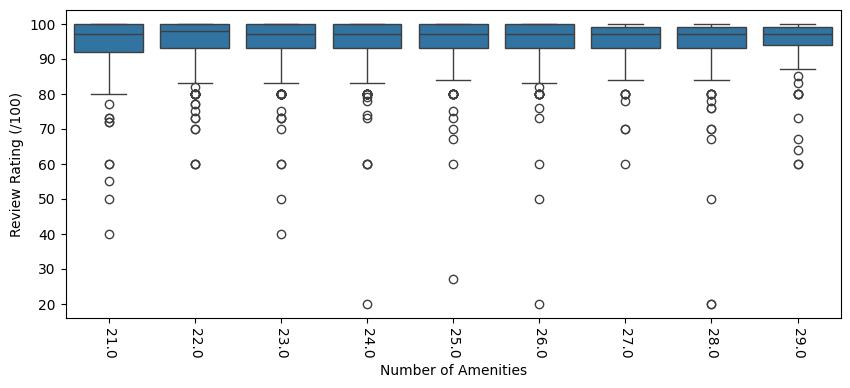

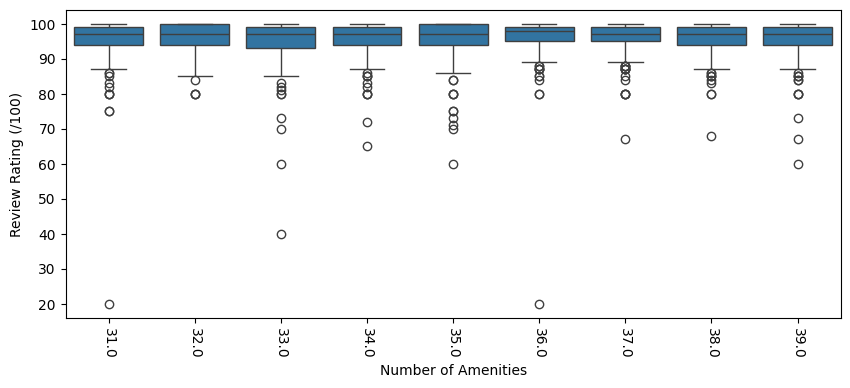

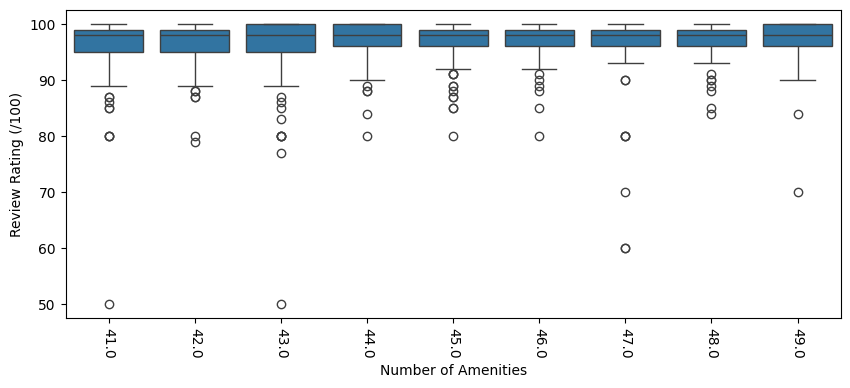

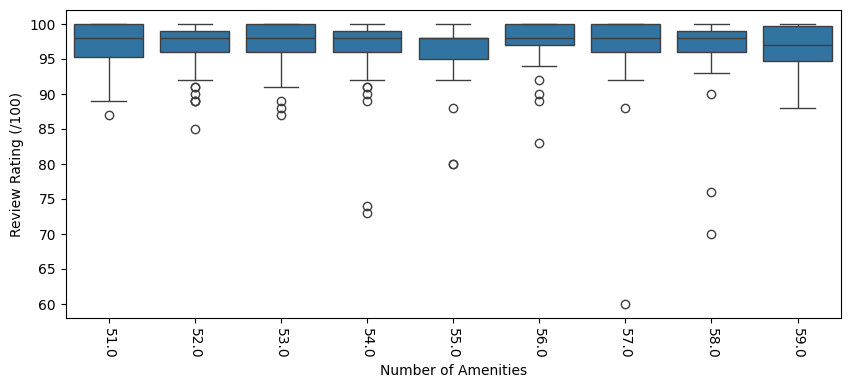

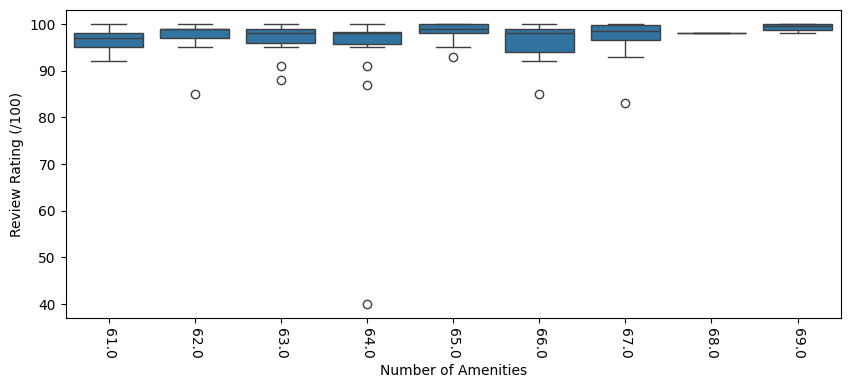

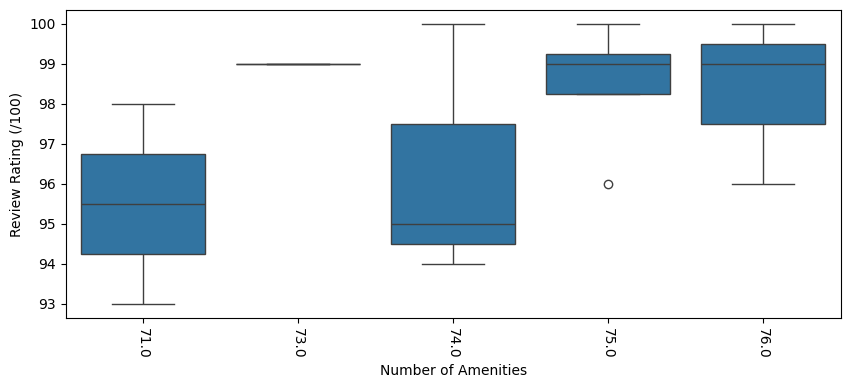

In [43]:
plot = 0
reviews = airbnb[(airbnb['num_amenities'] >= 0) & (airbnb['num_amenities'] < 10)]
for i in range(0, 90, 10):
    plt.figure(plot + 1, figsize=(10, 4))
    sns.boxplot(data = reviews, x = 'num_amenities', y = 'review_scores_rating')
    plt.xticks(rotation=270)
    plt.xlabel('Number of Amenities')
    plt.ylabel('Review Rating (/100)')
    plt.show()
    reviews = airbnb[(airbnb['num_amenities'] > i) & (airbnb['num_amenities'] < (i+10))]

In [20]:
airbnb

,amenities,first_review,host_neighbourhood,last_review,neighbourhood_cleansed,nightly_price,price_per_stay,property_type,review_scores_rating,room_type,number_of_reviews,days_of_reviews,num_amenities
1,"[TV, Wifi, Air conditioning, Kitchen, Free par...",2017-04-22,La Jolla,2017-08-31,La Jolla,1400.0,1400.0,Apartment,100.0,Entire home/apt,2.0,131.0,21.0
4,"[TV, Wifi, Kitchen, Free parking on premises, ...",2015-02-22,La Jolla,2018-09-23,La Jolla,110.0,110.0,Condominium,90.0,Private room,2.0,1309.0,11.0
10,"[TV, Cable TV, Internet, Wifi, Air conditionin...",2016-10-10,Black Mountain Ranch,2017-05-27,Rancho Penasquitos,75.0,75.0,Bungalow,93.0,Entire home/apt,3.0,229.0,34.0
12,"[TV, Internet, Wifi, Kitchen, Free parking on ...",2015-11-19,Pacific Beach,2018-07-02,Mission Bay,75.0,4500.0,House,100.0,Private room,27.0,956.0,37.0
13,"[TV, Wifi, Pool, Kitchen, Free parking on prem...",2016-02-21,Pacific Beach,2019-05-12,Pacific Beach,65.0,3900.0,Condominium,97.0,Entire home/apt,12.0,1176.0,32.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13042,"[TV, Cable TV, Wifi, Air conditioning, Kitchen...",2015-07-10,Mountain View,2019-08-16,Mount Hope,59.0,59.0,House,97.0,Private room,354.0,1498.0,45.0
13043,"[TV, Cable TV, Internet, Wifi, Wheelchair acce...",2016-01-26,Mission Beach,2019-05-20,Mission Bay,575.0,575.0,Condominium,99.0,Entire home/apt,42.0,1210.0,18.0
13048,"[TV, Cable TV, Internet, Wifi, Air conditionin...",2017-10-08,Pacific Beach,2019-06-11,La Jolla,2823.0,2823.0,House,83.0,Entire home/apt,6.0,611.0,24.0
13049,"[TV, Wifi, Kitchen, Free parking on premises, ...",2014-12-29,Pacific Beach,2019-08-11,Mission Bay,208.0,208.0,House,92.0,Entire home/apt,142.0,1686.0,17.0
